In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tqdm as notebook_tqdm

In [4]:
pip install bitsandbytes


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import json
import csv

# Đọc dữ liệu từ file JSON
with open('Law-QA/Law-QA-test.json', 'r', encoding='utf-8') as json_file:
    data_list = json.load(json_file)

# Initialize a set to keep track of unique domains
unique_domains = set()

# Iterate through the list of data entries and collect domains
for data in data_list:
    domains = data.get("domain", [])
    unique_domains.update(domains)

# Convert the set to a list and print the unique domains
unique_domains_list = list(unique_domains)
print("Unique domains:", unique_domains_list)

# Optionally, count the occurrences of each domain
from collections import Counter

domain_counter = Counter()
for data in data_list:
    domains = data.get("domain", [])
    domain_counter.update(domains)

print("Domain counts:", domain_counter)

Unique domains: ['Đầu tư', 'Sở hữu trí tuệ', 'Dịch vụ pháp lý', 'Công nghệ thông tin', 'Kế toán kiểm toán', 'Thuế phí lệ phí', 'Bộ máy hành chính', 'Bảo hiểm', 'Giao thông vận tải', 'Chứng khoán', 'Trách nhiệm hình sự', 'Tài nguyên môi trường', 'Thể thao y tế', 'Y tế', 'Quyền dân sự', 'Tài chính nhà nước', 'Tiền tệ ngân hàng', 'Xuất nhập khẩu', 'Lĩnh vực khác', 'Giáo dục', 'Thực phẩm', 'Lao động tiền lương', 'Văn hóa xã hội', 'Bất động sản', 'Xây dựng đô thị', 'Vi phạm hành chính', 'Thủ tục tố tụng', 'Thương mại', 'Doanh nghiệp', 'Kinh doanh thuốc']
Domain counts: Counter({'Bộ máy hành chính': 525, 'Lao động tiền lương': 251, 'Thương mại': 173, 'Doanh nghiệp': 164, 'Vi phạm hành chính': 162, 'Công nghệ thông tin': 129, 'Bảo hiểm': 120, 'Trách nhiệm hình sự': 117, 'Quyền dân sự': 116, 'Thể thao y tế': 98, 'Giao thông vận tải': 84, 'Tài chính nhà nước': 83, 'Tiền tệ ngân hàng': 83, 'Văn hóa xã hội': 77, 'Thuế phí lệ phí': 76, 'Bất động sản': 74, 'Giáo dục': 74, 'Đầu tư': 70, 'Lĩnh vực kh

In [5]:
len(data_list)

2903

In [1]:
import json
import csv

# Đọc dữ liệu từ file JSON
with open('VIMQA_DATA/vimqa_train.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)


In [2]:
data[0]

{'_id': '01899ad3-1544-4a3f-80d0-78807558bf96',
 'question': 'Film điện ảnh mà Margalit Ruth "Maggie" Gyllenhaal nhận được vai phụ độc lập vào năm 2001 có kinh phí là 4,5 triệu USD phải không?',
 'answer': 'đúng',
 'context': [['Donnie Darko',
   ['Ban đầu, bộ phim dự kiến phát hành đĩa phim luôn trước khi được phân phối bởi hãng Newmarket Films.',
    'Kinh phí làm phim này là 4,5 triệu USD và được quay trong vòng 28 ngày.',
    'Không như dự kiến, bộ phim chỉ thu về 4,1 triệu trên toàn cầu.',
    'Mặc dù vậy, bộ phim nhận được rất nhiều lời khen ngợi từ giới phê bình và lượng người xem tăng rất nhanh.',
    "Do đó năm 2004, bộ phim phát hành bản Director's Cut."]],
  ['Kinh tế Việt Nam',
   ['Tổng sản phẩm nội địa GDP năm 2016 là 202 tỷ USD theo danh nghĩa hoặc 595 tỷ USD theo sức mua tương đương .']],
  ['Danh sách 100 phim hay nhất của Viện phim Mỹ',
   ['Danh sách 100 phim hay nhất của Viện phim Mỹ (tiếng Anh: AFI’s 100 Years...100 Movies) là danh sách 100 bộ phim Mỹ được coi là h

In [17]:
new_data = []
for item in data:
    titles = [fact[0] for fact in item['supporting_facts']]

    # Trích xuất tất cả các câu tương ứng với mỗi tiêu đề từ context
    extracted_sentences = []
    for title in titles:
        for context_item in item['context']:
            if context_item[0] == title:
                sentences = context_item[1]
                extracted_sentences.extend(sentences)

    # Nối các câu lại với nhau
    concatenated_sentence = ' '.join(extracted_sentences)
    new_item = {
        'question': item['question'],
        'context': concatenated_sentence,
        'answer': item['answer']
    }
    new_data.append(new_item)


In [13]:
new_data = []
for item in data:
    title_indices = {fact[0]:fact[1] for fact in item['supporting_facts']}

    # Trích xuất câu tương ứng với mỗi tiêu đề từ context
    extracted_sentences = []
    for title, index in title_indices.items():
        for context_item in item['context']:
            if context_item[0] == title:
                sentence = context_item[1][index]
                extracted_sentences.append(sentence)

    # Nối các câu lại với nhau
    concatenated_sentence = ' '.join(extracted_sentences)
    new_item = {
        'question': item['question'],
        'context': concatenated_sentence,
        'answer': item['answer']
    }
    new_data.append(new_item)

In [18]:
new_data

[{'question': 'Film điện ảnh mà Margalit Ruth "Maggie" Gyllenhaal nhận được vai phụ độc lập vào năm 2001 có kinh phí là 4,5 triệu USD phải không?',
  'context': 'Margalit Ruth "Maggie" Gyllenhaal ( JIL-ən-hawl; sinh ngày 16 tháng 11 năm 1977) là một nữ diễn viên người Mỹ. Cô khởi đầu sự nghiệp điện ảnh với các bộ phim được đạo diễn bởi cha mình, Stephen Gyllenhaal, và nhận được vai phụ trong phim điện ảnh độc lập Donnie Darko (2001), bộ phim với em trai cô Jake Gyllenhaal đóng vai chính. Vai diễn đột phá của cô là vai thư ký trong phim. Margalit Ruth "Maggie" Gyllenhaal ( JIL-ən-hawl; sinh ngày 16 tháng 11 năm 1977) là một nữ diễn viên người Mỹ. Cô khởi đầu sự nghiệp điện ảnh với các bộ phim được đạo diễn bởi cha mình, Stephen Gyllenhaal, và nhận được vai phụ trong phim điện ảnh độc lập Donnie Darko (2001), bộ phim với em trai cô Jake Gyllenhaal đóng vai chính. Vai diễn đột phá của cô là vai thư ký trong phim. Ban đầu, bộ phim dự kiến phát hành đĩa phim luôn trước khi được phân phối bở

In [19]:
with open('train_vimqa1.json', 'w', encoding='utf-8') as f:
    json.dump(new_data, f, ensure_ascii=False, indent=4)

In [10]:
from multiprocessing import Pool
import requests
import os
import re 
from urllib.parse import quote
import json
NUM_CORE = 4

In [3]:
lst_proxy = []
with open("proxies.txt", 'r') as f:
    for line in f:
        lst_proxy.append(line.strip())
proxies = {
        'http' : ['http://' + x.replace(',',':') for x in lst_proxy]
    }
def translate_gg_free(text, proxies,tgt_lang = "vi", src_lang = "zh-CN" , max_tries = 20): 
    txt = quote(str(text))

    tran = '' 
    # try max_tries times
    while max_tries > 0:
        max_tries -= 1
        r = requests.get( 
                f'https://translate.googleapis.com/translate_a/single?client=gtx&sl={src_lang}&tl={tgt_lang}&dt=t&dt=bd&dj=1&q={txt}'
                ,proxies=proxies) 
        if r.status_code == 200: 
            resp = r.json() 
            # print(resp)
            for j in resp['sentences']: 
                tran += j['trans'] 
            tran = tran.strip()
            break
    return tran
def translate_long(text):
    # chunk text to < 1000 chars chunks
    lst_text = text.split("\n")
    lst_text = [x for x in lst_text if x != ""]
    # group text to 1000 chars chunks
    lst_text_group = []
    temp = ""
    for i in range(len(lst_text)):
        temp += lst_text[i] + "\n"
        if len(temp) > 1000:
            lst_text_group.append(temp)
            temp = ""
    if temp != "":
        lst_text_group.append(temp)
    # translate each chunk
    lst_tran = []
    for text in lst_text_group:
        lst_tran.append(translate_gg_free(text,proxies=proxies))
    return "\n".join(lst_tran)

In [18]:
with open('filtered_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [20]:
len(data)

2117

In [11]:
def contains_digit(text):
    # Sử dụng regex để kiểm tra nếu có bất kỳ ký tự số nào trong văn bản
    return bool(re.search(r'\d', text))


In [16]:
contains_digit(data[2]['question'])

False

In [17]:
# Danh sách để lưu các mẫu được lọc
filtered_data = []

# Lọc các mẫu có số trong trường 'question'
for entry in data:
    if contains_digit(entry['question']):
        filtered_data.append(entry)

# Lưu các mẫu đã được lọc vào tệp JSON mới
with open('filtered_data.json', 'w', encoding='utf-8') as output_file:
    json.dump(filtered_data, output_file, ensure_ascii=False, indent=2)


In [24]:
translate_long(data[0]['passage'])

'The River là một bộ phim truyền hình kinh dị phiêu lưu siêu nhiên năm 2012 của Mỹ ra mắt trong mùa đông truyền hình 2011–12 trên ABC như một sự thay thế giữa mùa. Tám tập được sản xuất cho mùa đầu tiên. 2012 đến ngày 20 tháng 3 năm 2012. Ngày 11 tháng 5 năm 2012, ABC chính thức hủy bỏ bộ phim.'

In [25]:
import json
import math

# Đọc dữ liệu từ tệp
with open('filtered_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

result = []
total_records = len(data)  # Tổng số mẫu dữ liệu

# Duyệt qua dữ liệu
for idx, entry in enumerate(data):
    tmp = {}
    tmp['passage'] = translate_long(entry['passage'])
    tmp['question'] = translate_long(entry['question'])
    tmp['answer'] = translate_long(entry['answer'])
    
    result.append(tmp)

    # Tính phần trăm đã hoàn thành
    percentage_complete = (idx + 1) / total_records * 100
    
    # In phần trăm sau mỗi 10% hoặc mỗi bước 10 mẫu (tùy thuộc vào điều nào ít hơn)
    if idx % max(1, total_records // 10) == 0:
        print(f'Tiến độ: {math.floor(percentage_complete)}%')

# Lưu dữ liệu đã xử lý vào tệp
output_filename = 'train_yesnoqa_translated.json'
with open(output_filename, 'w', encoding='utf-8') as output_file:
    json.dump(result, output_file, ensure_ascii=False, indent=2)

print('Hoàn thành xử lý dữ liệu')


Tiến độ: 0%
Tiến độ: 10%
Tiến độ: 19%
Tiến độ: 29%
Tiến độ: 39%
Tiến độ: 49%
Tiến độ: 59%
Tiến độ: 69%
Tiến độ: 79%
Tiến độ: 89%
Tiến độ: 99%
Hoàn thành xử lý dữ liệu


In [1]:
import json

# Đọc nội dung của file JSON
with open("train_yesnoqa_translated.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Kiểm tra nếu trường "passage" tồn tại, đổi tên thành "context"
if isinstance(data, list):
    for item in data:
        if "passage" in item:
            item["context"] = item.pop("passage")
else:
    if "passage" in data:
        data["context"] = data.pop("passage")

# Ghi nội dung đã thay đổi vào file JSON mới hoặc ghi đè lên file cũ
with open("train_yesnoqa_translated.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4, ensure_ascii=False)


In [2]:
pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 2.0 MB/s eta 0:00:06
   ---------------------------------------- 0.1/11.5 MB 919.0 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.5 MB 751.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/11.5 MB 774.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.5 MB 908.0 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.5 MB 838.1 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.5 MB 886.2 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.5 MB 941.3 kB/s eta 0:00:12
   - -------------------------------------- 0.4/11.5 MB 983.6 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.5 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/11.5 MB 1.3 MB/s eta 0:00


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import json

# Đọc dữ liệu từ file JSON 1
with open('data-test/bartpho1.json', 'r', encoding='utf-8') as f:
    data1 = json.load(f)

# Đọc dữ liệu từ file JSON 2
with open('data-test/bartpho2.json', 'r', encoding='utf-8') as f:
    data2 = json.load(f)

# Đọc dữ liệu từ file JSON 3
with open('data-test/bartpho3.json', 'r', encoding='utf-8') as f:
    data3 = json.load(f)

# Tạo DataFrame từ dữ liệu JSON
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Đổi tên cột answer để phân biệt
df1 = df1.rename(columns={'answer': 'answer1'})
df2 = df2.rename(columns={'answer': 'answer2'})
df3 = df3.rename(columns={'answer': 'answer3'})

# Hợp nhất các DataFrame dựa trên question và context
merged_df = pd.merge(df1, df2, on=['question', 'context'])
merged_df = pd.merge(merged_df, df3, on=['question', 'context'])

# Ghi dữ liệu ra file CSV
merged_df.to_csv('merged_answers.csv', index=False, encoding='utf-8-sig')


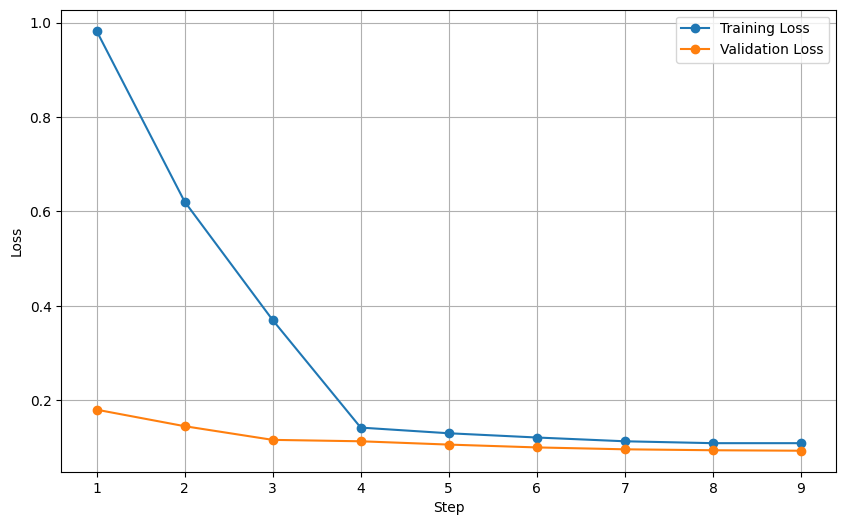

In [6]:
import matplotlib.pyplot as plt

# Data preparation
steps = list(range(1, 10))  # 9 steps in one epoch
train_loss = [0.983, 0.621, 0.370, 0.142, 0.130, 0.121, 0.113, 0.109, 0.109]  # Example training losses per step
val_loss = [0.180, 0.145, 0.116, 0.113, 0.106, 0.100, 0.096, 0.094, 0.093]  # Example validation losses per step

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(steps, train_loss, marker='o', label='Training Loss')
plt.plot(steps, val_loss, marker='o', label='Validation Loss')

plt.xlabel('Step')
plt.ylabel('Loss')
#plt.title('Training and Validation Loss Over Steps in One Epoch')
plt.legend()
plt.grid(True)
plt.xticks(steps)

plt.show()
